[Reference](https://medium.com/@akaivdo/create-an-interactive-web-app-for-data-science-in-10-minutes-with-streamlit-11b55a8d0b25)

In [2]:
!pip install streamlit

     |████████████████████████████████| 10.1 MB 13.7 MB/s 
     |████████████████████████████████| 111 kB 47.6 MB/s 
     |████████████████████████████████| 76 kB 2.6 MB/s 
     |████████████████████████████████| 164 kB 47.2 MB/s 
     |████████████████████████████████| 181 kB 18.5 MB/s 
     |████████████████████████████████| 4.3 MB 44.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 131 kB 24.2 MB/s 
     |████████████████████████████████| 130 kB 48.4 MB/s 
     |████████████████████████████████| 428 kB 52.8 MB/s 
     |████████████████████████████████| 793 kB 42.1 MB/s 
     |████████████████████████████████| 381 kB 39.8 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c9d70d9b1a03a25e9e08630cae9913a621c657cc0929205850c7d62530d5eb04
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
  Created wheel for validators: filename=validator

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

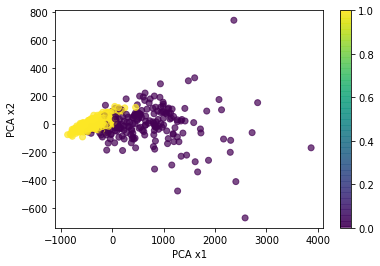

In [2]:
import streamlit as st 
import numpy as np 

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## Add Title and Subheader
st.title('Streamlit Demo')
st.subheader('Training a machine learning model online')

## Load the breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

st.write('Shape of X:', X.shape)
st.write('Target number:', len(np.unique(y)))

import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
df[:5]


## Set up three Machine Learning Algorithms
clf_name = st.sidebar.selectbox(
    'Select Machine Learning Algorithms',
    ('KNN', 'SVM', 'Random Forest')
)

st.write(f"""
You are using **{clf_name}** classifier.  
""")

if clf_name == 'SVM':
    C = st.sidebar.slider('C', 0.01, 10.0)
elif clf_name == 'KNN':
    K = st.sidebar.slider('K', 1, 20)
else:
    max_depth = st.sidebar.slider('max_depth', 2, 32)
    n_estimators = st.sidebar.slider('n_estimators', 1, 50)


if clf_name == 'SVM':
    clf = SVC(C=C)
elif clf_name == 'KNN':
    clf = KNeighborsClassifier(n_neighbors=K)
else:
    clf = RandomForestClassifier(n_estimators=max_depth, 
        max_depth=n_estimators, random_state=42)

## Train the model and calculate the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

st.write(f'Classifier: **{clf_name}**')
st.write(f'Accuracy: **{round(accuracy*100, 2)}%**')

## Draw the result based PCA algorithm
pca = PCA(2)
X_2d = pca.fit_transform(X)

x1 = X_2d[:, 0]
x2 = X_2d[:, 1]

fig = plt.figure()
plt.scatter(x1, x2,
        c=y, alpha=0.7,
        cmap='viridis')

plt.xlabel('PCA x1')
plt.ylabel('PCA x2')
plt.colorbar()

st.pyplot(fig)